# MNIST and CNN experiments

In [12]:
import torch
import torchvision
from torchvision import datasets, transforms

# Using MLP

In [13]:
torch.manual_seed(42)
transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train= datasets.MNIST(root='./data/MNIST', train=True, download=True, transform=transform)
test= datasets.MNIST(root='./data/MNIST', train=False, download=True, transform=transform)

Total No of images in the train dataset 60000
Total No of classes in the train dataset: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
Total No of images in the test dataset 10000
Total No Classes in the test dataset: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
Image shape: torch.Size([1, 28, 28])


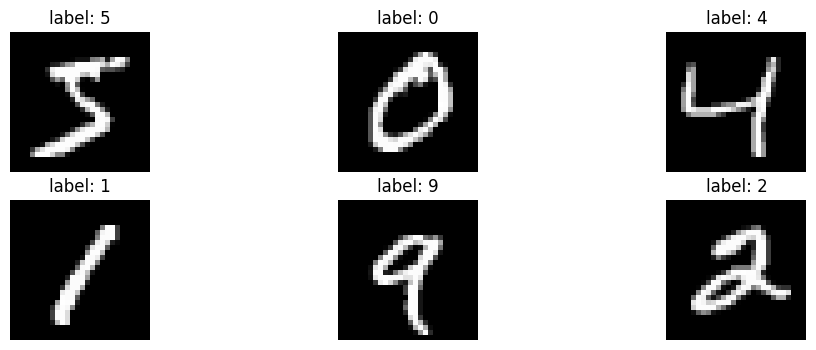

In [14]:
import matplotlib.pyplot as plt

print("Total No of images in the train dataset", len(train))
print("Total No of classes in the train dataset:", train.classes)
print("Total No of images in the test dataset", len(test))
print("Total No Classes in the test dataset:", test.classes)
image, label = train[0]
print('Image shape:', image.shape)

plt.figure(figsize=(12,4))
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(train[i][0].squeeze(), cmap='gray') 
    plt.title(f'label: {train[i][1]}')
    plt.axis('off')
plt.show()

In [15]:
#flattening the MNIST images into vectors
X_train= train.data.numpy().reshape(-1, 28*28)
y_train= train.targets.numpy()

X_test= test.data.numpy().reshape(-1, 28*28)
y_test= test.targets.numpy()
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (60000, 784)
Shape of y_train: (60000,)
Shape of X_test: (10000, 784)
Shape of y_test: (10000,)


In [16]:
import numpy as np
import torch.nn as nn

#activation functions
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))
def tanh(x):
    return torch.tanh(x)

# cross entropy loss fucntion
def cross_entropy_loss(y_pred, y_true):
    y_pred = torch.softmax(y_pred, dim=1) 
    return -torch.sum(y_true * torch.log(y_pred + 1e-10))/y_pred.size(0) 

class MNIST_NN(nn.Module):
    def __init__(self, activation_function= nn.ReLU()):
        super(MNIST_NN, self).__init__()
        self.fc1= nn.Linear(28*28, 30) # First hidden layer with 30 neurons
        self.fc2= nn.Linear(30, 20) # Second hidden layer with 20 neurons
        self.fc3= nn.Linear(20, 10) # Output layer with 10 neurons (for 10 classes)
        self.activation= activation_function 

    def forward(self, x):
        x= self.activation(self.fc1(x))  
        x= self.activation(self.fc2(x))  
        x= self.fc3(x)             
        return x

In [17]:
batch_size= 128
epochs= 1000         
lr= 0.001
num_classes=10
y_train_one_hot= np.zeros((y_train.size, num_classes))

for a in range(len(y_train)):
    y_train_one_hot[a][y_train[a]]= 1

X_train_tensor= torch.tensor(X_train, dtype=torch.float)
y_train_tensor= torch.tensor(y_train_one_hot, dtype=torch.long)
X_test_tensor= torch.tensor(X_test, dtype=torch.float)
y_test_tensor= torch.tensor(y_test, dtype=torch.long)

In [19]:
# initializing model and optimizer
model= MNIST_NN()  
optimizer= torch.optim.Adam(model.parameters(), lr=lr)

epoch_val= []
loss_val= []

# training loop
for epoch in range(epochs+1):
    model.train()
    optimizer.zero_grad()
    # forward pass
    output= model(X_train_tensor)
    loss= cross_entropy_loss(output, y_train_tensor)

    # backward pass
    loss.backward()
    optimizer.step()

    epoch_val.append(epoch)
    loss_val.append(loss.item())
    if (epoch % 100 == 0):
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")


Epoch 0, Loss: 14.940207
Epoch 100, Loss: 0.451789
Epoch 200, Loss: 0.250594
Epoch 300, Loss: 0.189641
Epoch 400, Loss: 0.154062
Epoch 500, Loss: 0.129203
Epoch 600, Loss: 0.111037
Epoch 700, Loss: 0.097081
Epoch 800, Loss: 0.085939
Epoch 900, Loss: 0.076311
Epoch 1000, Loss: 0.068344


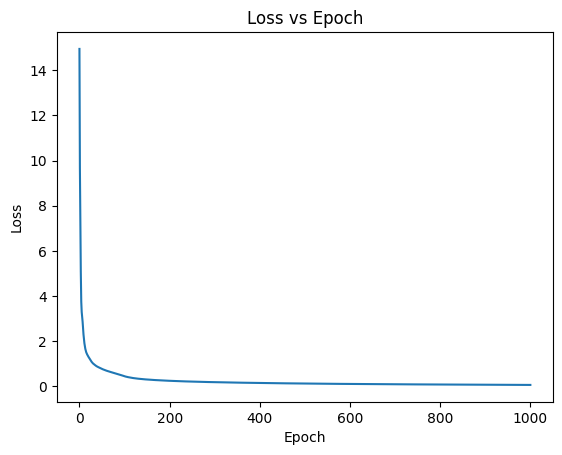

In [20]:
# Loss vs Epoch plot
loss_lst = [i for i in loss_val] 
plt.plot(epoch_val, loss_lst)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

In [23]:
#testing model on test dataset 
model.eval()
with torch.no_grad():
    output= model(X_test_tensor)
    predicted= output.argmax(dim=1)

predicted_class= predicted.numpy().tolist()
true_class= y_test_tensor.numpy().tolist()

print("Predicted (starting 10):", predicted_class[:10])
print("True (starting 10):", true_class[:10])

Predicted (starting 10): [7, 2, 1, 0, 4, 1, 4, 9, 4, 9]
True (starting 10): [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [24]:
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# f1 score and confusion matrix 
f1= f1_score(y_test_tensor.numpy(), predicted, average='weighted')
conf_matrix= confusion_matrix(y_test_tensor.numpy(), predicted)
corr= 0
for a in range(len(y_test_tensor)):
    if y_test_tensor[a] == predicted[a]:
        corr += 1

acc= (corr / len(y_test_tensor)) * 100
print("Accuracy:", acc, "%")
print("F1 score:", f1)

Accuracy: 94.91000000000001 %
F1 score: 0.9490753303877096


Digit 0 confused with: [6, 5, 8]
Digit 1 confused with: [2, 3, 5]
Digit 2 confused with: [7, 0, 3]
Digit 3 confused with: [5, 2, 8]
Digit 4 confused with: [9, 6, 2]
Digit 5 confused with: [3, 8, 6]
Digit 6 confused with: [0, 5, 4]
Digit 7 confused with: [2, 9, 8]
Digit 8 confused with: [3, 5, 6]
Digit 9 confused with: [4, 8, 7]


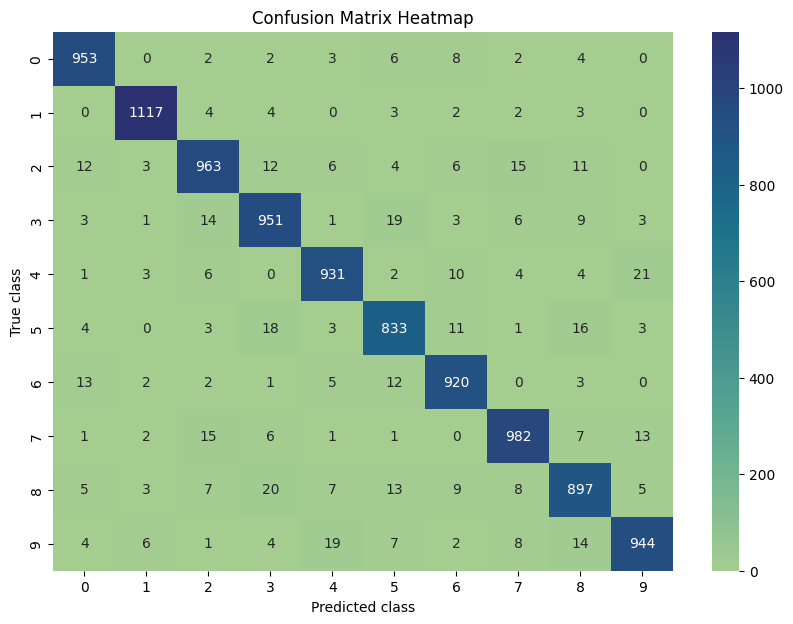

In [42]:
# Top 3 confused values
confusion= {}
for i in range(10):
    confusion[i]= conf_matrix[i]

MLP_lst = []
k= 3

for dig, cnt in confusion.items():
    confused_digits= []
    for j in range(10):
        if j != dig and cnt[j] > 0:
            confused_digits.append((j, cnt[j]))
    confused_digits.sort(key=lambda x: x[1], reverse=True)
    vals= []
    for i in range(min(k, len(confused_digits))):
        vals.append(confused_digits[i][0])   
    print(f"Digit {dig} confused with: {vals}")
    MLP_lst.append(vals)
    
    
labels= [i for i in range(10)]
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix Heatmap')
plt.show()

Training Random Forest model on MNIST Dataset

In [29]:
from sklearn.ensemble import RandomForestClassifier

# converting one hot encoded labels to single integer labels for RF
y_train_rf= np.argmax(y_train_one_hot, axis=1)  
rf_model= RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train_rf)

RandomForestClassifier(n_estimators=150, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score

pred_rf= rf_model.predict(X_test)
f1_RF= f1_score(y_test, pred_rf, average='weighted')
conf_matrix_rf= confusion_matrix(y_test, pred_rf)
acc_RF = accuracy_score(y_test, pred_rf)
print("F1 score:", f1_RF)
print(f"Accuracy: {acc_RF * 100:.2f}%")



F1 score: 0.9689834673822777
Accuracy: 96.90%


Digit 0 confused with: [8, 5, 6]
Digit 1 confused with: [3, 2, 5]
Digit 2 confused with: [7, 8, 0]
Digit 3 confused with: [2, 7, 8]
Digit 4 confused with: [9, 6, 8]
Digit 5 confused with: [3, 6, 8]
Digit 6 confused with: [0, 5, 8]
Digit 7 confused with: [2, 9, 1]
Digit 8 confused with: [9, 3, 2]
Digit 9 confused with: [3, 4, 5]


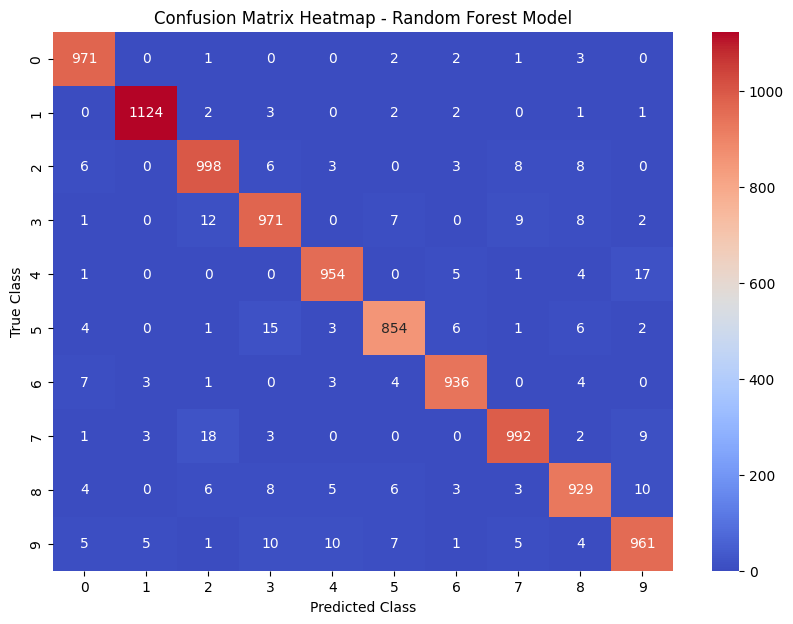

In [40]:
confusion= {}
for i in range(10):
    confusion[i]= conf_matrix_rf[i]  

lst= []
k= 3 

for dig, cnt in confusion.items():
    confused_digits= []
    for j in range(10):
        if j != dig and cnt[j] > 0:
            confused_digits.append((j, cnt[j]))
    confused_digits.sort(key=lambda x: x[1], reverse=True)

    vals= [confused_digits[i][0] for i in range(min(k, len(confused_digits)))]
    print(f"Digit {dig} confused with: {vals}")
    lst.append(vals)


labels= [i for i in range(10)]
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='coolwarm',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Heatmap - Random Forest Model')
plt.show()


Training Logistic Regression model on MNIST 

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_rf)
pred_log_reg= log_reg.predict(X_test)

/Users/zainab/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
f1_log_ref= f1_score(y_test, pred_log_reg, average='weighted')
conf_matrix_log_reg= confusion_matrix(y_test, pred_log_reg)
acc_log_reg= accuracy_score(y_test, pred_log_reg)
print("F1 Score (Logistic Regression):", f1_log_ref)
print(f"Accuracy: {acc_log_reg * 100:.2f}%")


F1 Score (Logistic Regression): 0.9200970758269841
Accuracy: 92.03%


Digit 0 confused with: [6, 5, 2]
Digit 1 confused with: [8, 2, 3]
Digit 2 confused with: [8, 3, 1]
Digit 3 confused with: [5, 8, 2]
Digit 4 confused with: [9, 6, 8]
Digit 5 confused with: [8, 3, 6]
Digit 6 confused with: [5, 0, 2]
Digit 7 confused with: [9, 2, 3]
Digit 8 confused with: [5, 3, 1]
Digit 9 confused with: [7, 4, 8]


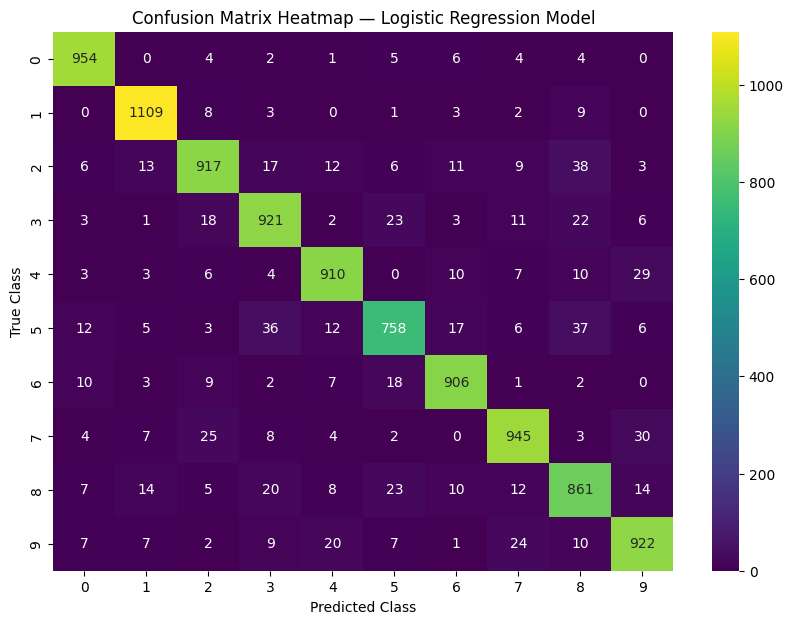

In [37]:
confusion= {}
for i in range(10):
    confusion[i]= conf_matrix_log_reg[i]

k= 3
lr_confusions= []
for dig, cnt in confusion.items():
    confused_digits = []
    for j in range(10):
        if j != dig and cnt[j] > 0:
            confused_digits.append((j, cnt[j]))

    confused_digits.sort(key=lambda x: x[1], reverse=True)
    vals = [confused_digits[i][0] for i in range(min(k, len(confused_digits)))]
    print(f"Digit {dig} confused with: {vals}")
    lr_confusions.append(vals)

labels = [i for i in range(10)]
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Heatmap — Logistic Regression Model')
plt.show()

Comparing MLP against Random Forest and Logistic Regression using accuracy, F1-score, confusion matrix

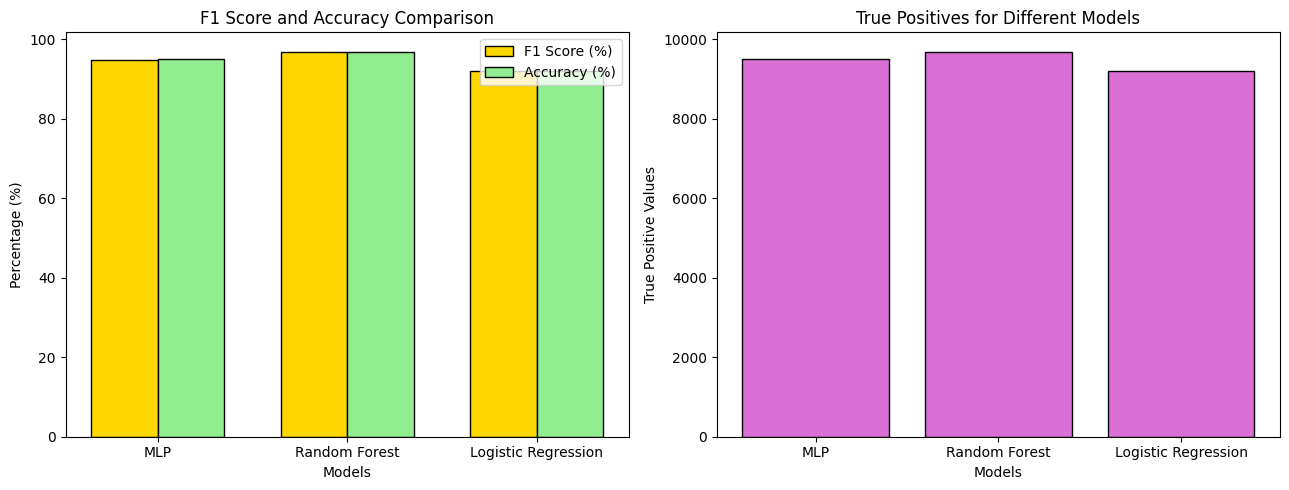

In [38]:
# True Positives
tp_mlp= np.diag(conf_matrix)
tp_rf= np.diag(conf_matrix_rf)
tp_log_reg= np.diag(conf_matrix_log_reg)

# Accuracy 
acc_mlp = accuracy_score(y_test, predicted_class)
acc_rf = accuracy_score(y_test, pred_rf)
acc_log_reg = accuracy_score(y_test, pred_log_reg)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

x_axis = np.arange(3)
models = ['MLP', 'Random Forest', 'Logistic Regression']


bar_width = 0.35
axes[0].bar(x_axis - bar_width/2, [f1*100, f1_RF*100, f1_log_ref*100], width=bar_width, color='gold', edgecolor='black', label='F1 Score (%)')
axes[0].bar(x_axis + bar_width/2, [acc_mlp*100, acc_rf*100, acc_log_reg*100], width=bar_width, color='lightgreen', edgecolor='black', label='Accuracy (%)')
axes[0].set_xticks(x_axis)
axes[0].set_xticklabels(models)
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_title('F1 Score and Accuracy Comparison')
axes[0].legend()

axes[1].bar(models,[np.sum(tp_mlp), np.sum(tp_rf), np.sum(tp_log_reg)], color='orchid', edgecolor='black')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('True Positive Values')
axes[1].set_title('True Positives for Different Models')

plt.tight_layout()
plt.show()


In [44]:
import pandas as pd

num_digits = 10
k = len(MLP_lst[0])

data= np.zeros((num_digits, 1 + 3 * k))
data[:, 0]= np.arange(num_digits)
data[:, 1:k + 1]= MLP_lst
data[:, k + 1:2 * k + 1]= lst
data[:, 2 * k + 1:]= lr_confusions

column_names= ['Digit'] + \
    [f'MLP_most_confused_{i}' for i in range(1, k + 1)] + \
    [f'RF_most_confused_{i}' for i in range(1, k + 1)] + \
    [f'LR_most_confused_{i}' for i in range(1, k + 1)]

confusion_df= pd.DataFrame(data, columns=column_names)
print(confusion_df)


   Digit  MLP_most_confused_1  MLP_most_confused_2  MLP_most_confused_3  \
0    0.0                  6.0                  5.0                  8.0   
1    1.0                  2.0                  3.0                  5.0   
2    2.0                  7.0                  0.0                  3.0   
3    3.0                  5.0                  2.0                  8.0   
4    4.0                  9.0                  6.0                  2.0   
5    5.0                  3.0                  8.0                  6.0   
6    6.0                  0.0                  5.0                  4.0   
7    7.0                  2.0                  9.0                  8.0   
8    8.0                  3.0                  5.0                  6.0   
9    9.0                  4.0                  8.0                  7.0   

   RF_most_confused_1  RF_most_confused_2  RF_most_confused_3  \
0                 8.0                 5.0                 6.0   
1                 3.0                 2.0   

Observations:
1) Among the three models, the Random Forest classifier achieved the highest accuracy (96.9%) and F1 score (0.969), followed by the Neural Network (MLP) with 94.9% accuracy and an F1 score of 0.949, and finally Logistic Regression, which obtained 92.0% accuracy and an F1 score of 0.920.
The Random Forest model performed best in terms of classification metrics and required less training time compared to the Neural Network due to its ability to capture complex patterns in the data.

2) Lossfor the MLP consistently decreased from 14.94 at epoch 0 to 0.068 at epoch 1000, indicating stable convergence.

3) All three models showed similar confusion for certain digits, particularly 2, 5, 8, and 0, which were misclassified more frequently. These digits are visually similar, which likely causes overlapping feature representations.
For example, digit 5 was one of the most misclassified across all models. It was often confused with 3, 6, 8, 0, and 2, reflecting its resemblance in curved or closed shapes. Similarly, digit 0 was frequently confused with 6, 5, and 8 for the MLP, and with 8, 5, and 6 for the Random Forest. The Logistic Regression model also showed consistent confusion for 0 with 6, 5, 2, which indicates its limited capacity to handle complex pixel variations.



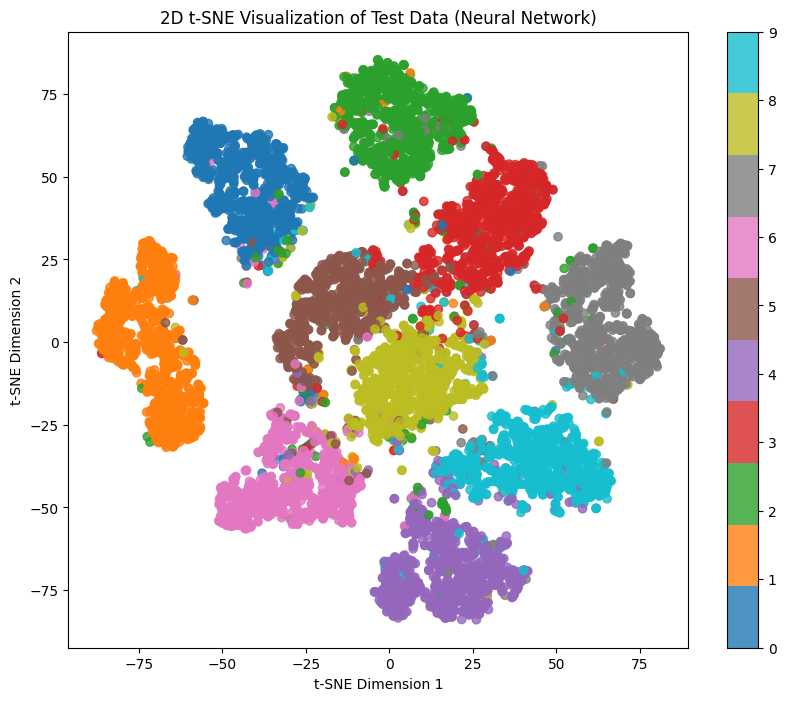

In [45]:
from sklearn.manifold import TSNE

# ---- Get outputs from hidden layers for test data ----
with torch.no_grad():
    layer_1_out= model.activation(model.fc1(X_test_tensor))
    layer_2_out= model.activation(model.fc2(layer_1_out))

layer_2_out= layer_2_out.numpy()
tsne_2d= TSNE(n_components=2, random_state=42)
tsne_3d= TSNE(n_components=3, random_state=42)

layer_2_out_2d= tsne_2d.fit_transform(layer_2_out)
layer_2_out_3d= tsne_3d.fit_transform(layer_2_out)

# ---- Plot 2D t-SNE ----
plt.figure(figsize=(10, 8))
plt.scatter(layer_2_out_2d[:, 0], layer_2_out_2d[:, 1],c=y_test, cmap='tab10', alpha=0.8)
plt.colorbar()
plt.title('2D t-SNE Visualization of Test Data (Neural Network)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


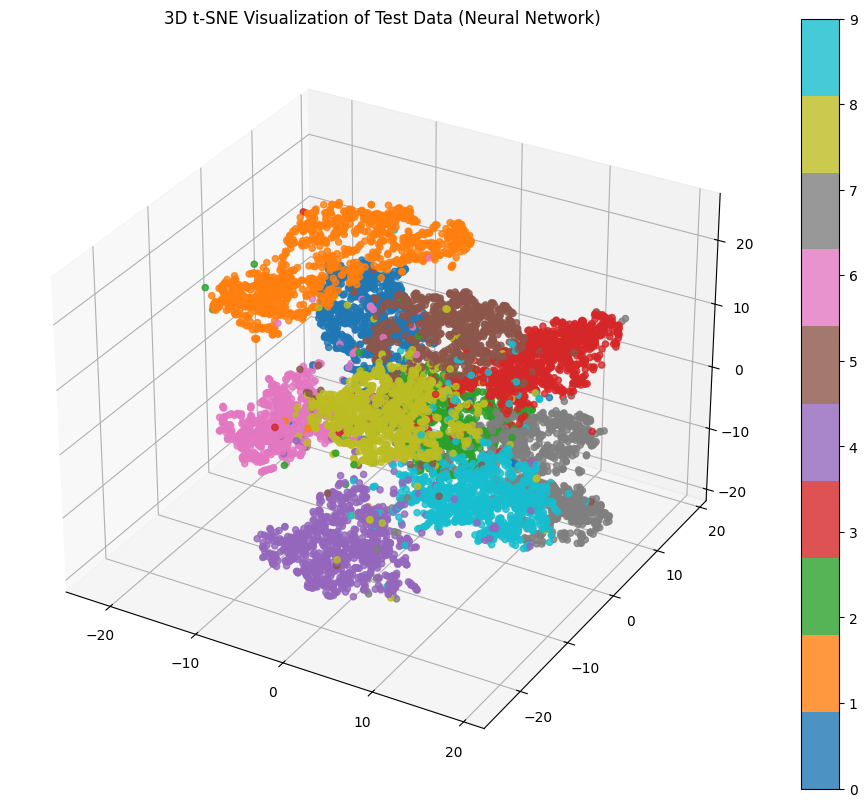

In [46]:
#3D t-SNE
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(layer_2_out_3d[:, 0],layer_2_out_3d[:, 1],layer_2_out_3d[:, 2],c=y_test, cmap='tab10', alpha=0.8)
plt.colorbar(scatter)
plt.title('3D t-SNE Visualization of Test Data (Neural Network)')
plt.show()

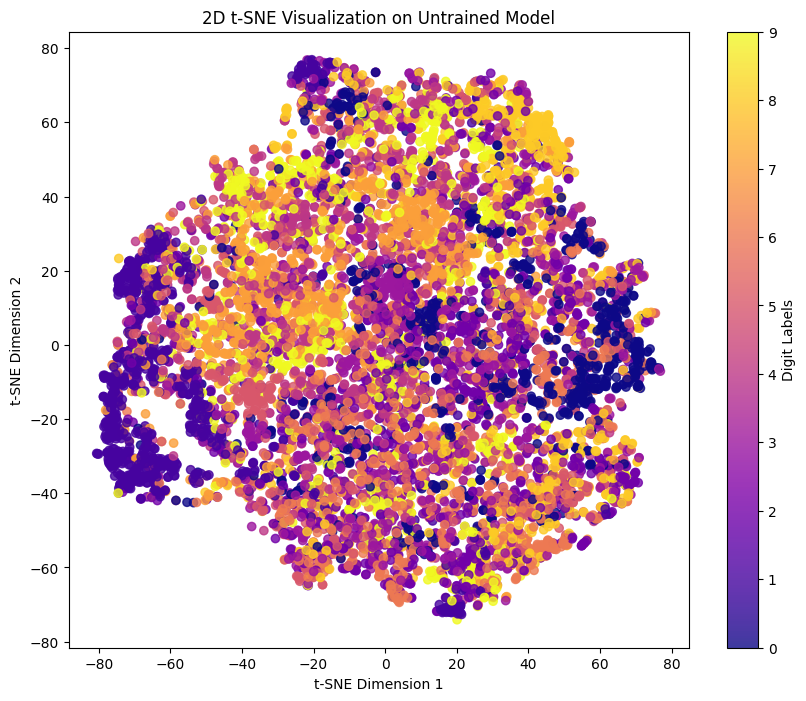

In [48]:
model_untrained= MNIST_NN()
with torch.no_grad():
    layer_1_out_untrained= model_untrained.activation(model_untrained.fc1(X_test_tensor))
    layer_2_out_untrained= model_untrained.activation(model_untrained.fc2(layer_1_out_untrained))
layer_2_out_untrained= layer_2_out_untrained.numpy()
tsne_2d= TSNE(n_components=2, random_state=42)
tsne_3d= TSNE(n_components=3, random_state=42)

layer_2_output_2d= tsne_2d.fit_transform(layer_2_out_untrained)
layer_2_output_3d= tsne_3d.fit_transform(layer_2_out_untrained)
plt.figure(figsize=(10, 8))
plt.scatter(layer_2_output_2d[:, 0], layer_2_output_2d[:, 1],c=y_test, cmap='plasma', alpha=0.8)
plt.colorbar(label="Digit Labels")
plt.title('2D t-SNE Visualization on Untrained Model')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
# 3D t-SNE 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    layer_2_output_3d[:, 0],
    layer_2_output_3d[:, 1],
    layer_2_output_3d[:, 2],
    c=y_test, cmap='plasma', alpha=0.8
)

plt.colorbar(scatter)
ax.set_title('3D t-SNE Visualization on Untrained Model')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()

Comparison between t-sne obtained from trained and untrained models:-

When we train, the second layer classifies the digits which is visible when they are clustered together. In untrained model, the digits are scattered and not clustered together. This shows the trained model has learned to classify the digits after training and that is why we see similar digits being placed lose to each other in the t-sne plot. 

Testing trained MLP on Fashion-MNIST dataset

100%|██████████| 26.4M/26.4M [00:09<00:00, 2.74MB/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 143kB/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:02<00:00, 1.88MB/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 2.21MB/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw

Length of the train dataset: 60000
Length of the test dataset: 10000
Number of classes in the train dataset: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Number of classes in the test dataset: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Image shape: torch.Size([1, 28, 28]) 9


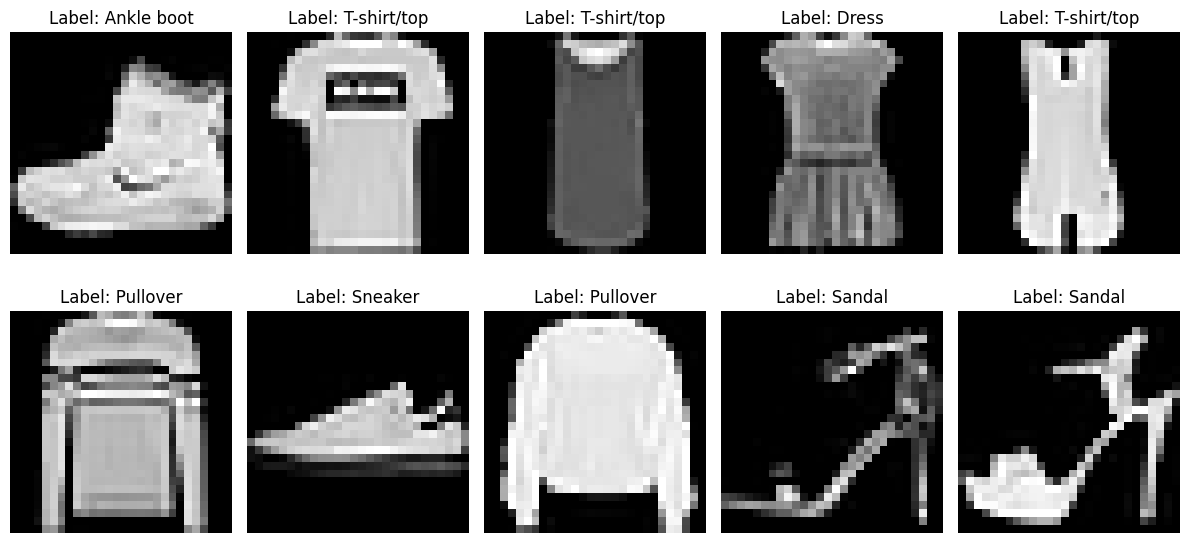

In [50]:
transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_datasetf= datasets.FashionMNIST(root='./data/FashionMNIST', train=True, download=True, transform=transform)
test_datasetf = datasets.FashionMNIST(root='./data/FashionMNIST', train=False, download=True, transform=transform)

print("Length of the train dataset:", len(train_datasetf))
print("Length of the test dataset:", len(test_datasetf))
print("Number of classes in the train dataset:", train_datasetf.classes)
print("Number of classes in the test dataset:", test_datasetf.classes)
image, label= train_datasetf[0]
print('Image shape:', image.shape, label)


class_names= train_datasetf.classes
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    image, label= train_datasetf[i]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f"Label: {class_names[label]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [51]:
#converting the data to numpy array
train_images= train_datasetf.data.numpy().reshape(-1, 28 * 28)
train_labels= train_datasetf.targets.numpy()
test_images= test_datasetf.data.numpy().reshape(-1, 28 * 28)
test_labels= test_datasetf.targets.numpy()
print("data shape:", train_images.shape)

# converting to torch tensors
train_images_tensor= torch.tensor(train_images, dtype=torch.float)
train_labels_tensor= torch.tensor(train_labels, dtype=torch.float)
test_images_tensor= torch.tensor(test_images, dtype=torch.float)
test_labels_tensor= torch.tensor(test_labels, dtype=torch.long)

data shape: (60000, 784)


Training Accuracy on Fashion-MNIST: 7.18%


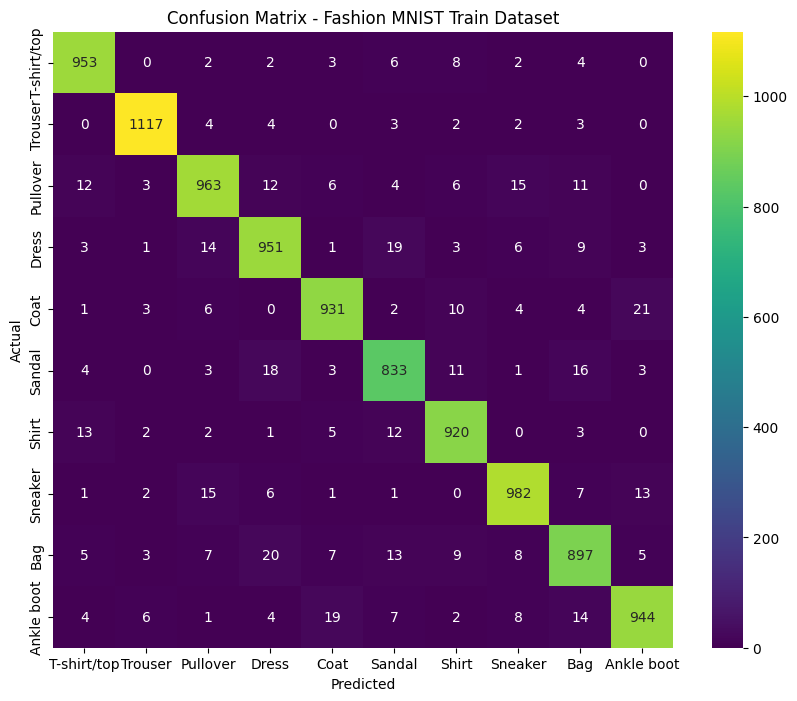

In [53]:
model.eval()

with torch.no_grad():
    output = model(train_images_tensor)
pred = output.argmax(dim=1)
corr = (pred == train_labels).sum().item()
acc= corr * 100 / len(train_labels)

print(f"Training Accuracy on Fashion-MNIST: {acc:.2f}%")
pred= pred.numpy()
conf_matrix_fashion= confusion_matrix(train_labels, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=train_datasetf.classes, yticklabels=train_datasetf.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Fashion MNIST Train Dataset')
plt.show()


Test Accuracy on Fashion-MNIST: 6.84%


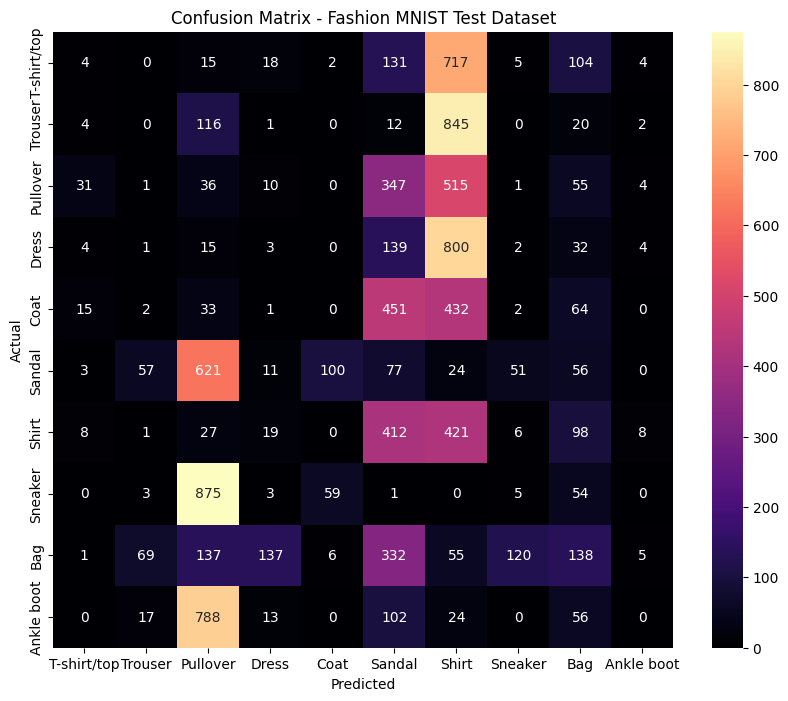

In [54]:
model.eval()

with torch.no_grad():
    output= model(test_images_tensor)
pred= output.argmax(dim=1)
corr= (pred == test_labels).sum().item()
acc= corr * 100 / len(test_labels)

print(f"Test Accuracy on Fashion-MNIST: {acc:.2f}%")
pred= pred.numpy()
conf_matrix_fashion_test= confusion_matrix(test_labels, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_fashion_test, annot=True, cmap='magma', fmt='d', xticklabels=test_datasetf.classes, yticklabels=test_datasetf.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Fashion MNIST Test Dataset')
plt.show()

Observations:-
1) The MLP model trained on MNIST achieved an accuracy of 6.84% on the Fashion-MNIST dataset, indicating that while it has learned some generalizable features, its performance is significantly lower compared to its performance on the MNIST dataset. This is because the Fashion-MNIST dataset contains images of clothing items, which are visually different from handwritten digits in the MNIST dataset.

2) The confusion matrix for the Fashion-MNIST dataset shows that certain classes, such as T-shirts/tops and pullovers, are more frequently confused with each other. This suggests that the model struggles to differentiate between visually similar clothing items, likely due to the differences in texture and shape compared to handwritten digits.

3) Also, some of the items match with certain numbers and that number is dark in the confusion matrix. 

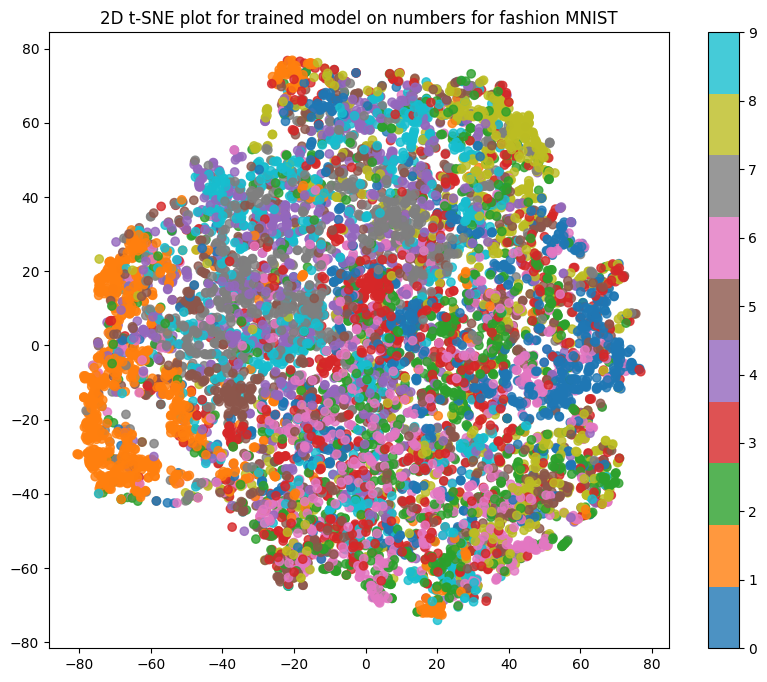

In [56]:
with torch.no_grad():
    layer_1_out= model.activation(model.fc1(test_images_tensor))
    layer_2_out= model.activation(model.fc2(layer_1_out))
tsne_2d= TSNE(n_components=2, random_state=42)
tsne_3d= TSNE(n_components=3, random_state=42)
layer_2_out= layer_2_out.numpy()

layer_2_out_2d = tsne_2d.fit_transform(layer_2_out)
layer_2_out_3d = tsne_3d.fit_transform(layer_2_out)

plt.figure(figsize=(10, 8))
plt.scatter(layer_2_output_2d[:, 0], layer_2_output_2d[:, 1], c=y_test, cmap='tab10', alpha=0.8)
plt.colorbar()
plt.title('2D t-SNE plot for trained model on numbers for fashion MNIST')
plt.show()

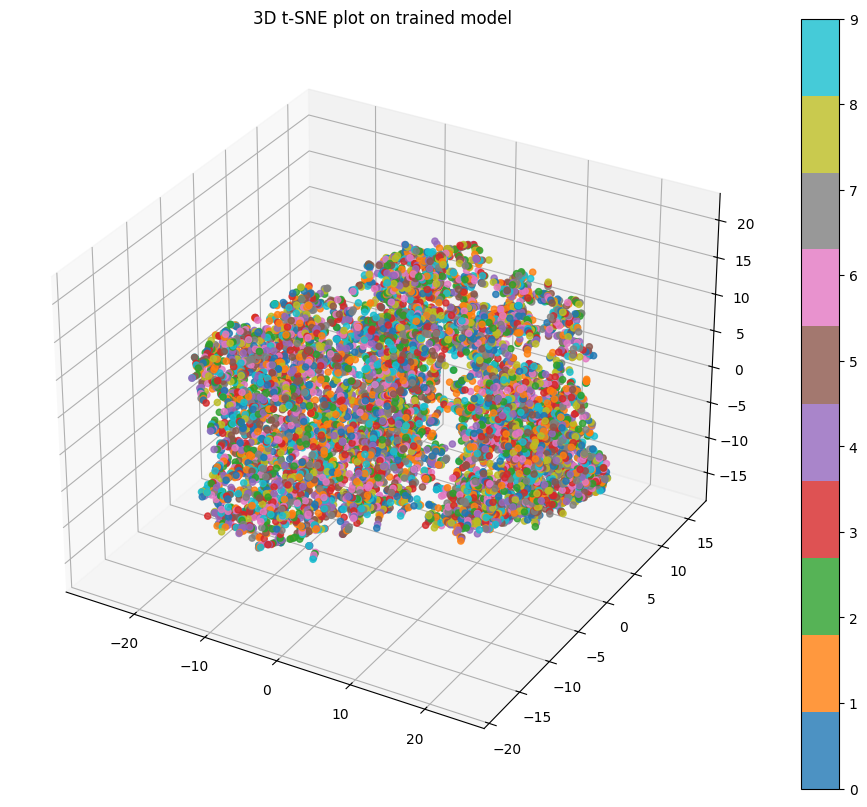

In [57]:
# 3d plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(layer_2_out_3d[:, 0], layer_2_out_3d[:, 1], layer_2_out_3d[:, 2], c=y_test, cmap='tab10', alpha=0.8)
colorbar = plt.colorbar(scatter)
plt.title('3D t-SNE plot on trained model')
plt.show()

Observations:-

The points are placed randomly, and are not clustered in the 2d and 3d t-sne plots which shows that the model is not able to differentiate between the fashion dataset, and the digits dataset. Hnec,e the embedding obtained from the trained model on fashion dataset is not able to differentiate between the classes.

# 3.2 Using CNN


In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader= DataLoader(train, batch_size=64, shuffle=True)
test_loader= DataLoader(test, batch_size=1000, shuffle=False)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1= nn.Conv2d(1, 32, kernel_size=3)  # 1 input channel, 32 filters
        self.pool= nn.MaxPool2d(2, 2)
        self.fc1= nn.Linear(32 * 13 * 13, 128)  # after conv & pool, size becomes 13x13
        self.fc2= nn.Linear(128, 10)  # 10 output classes

    def forward(self, x):
        x= self.pool(F.relu(self.conv1(x)))
        x= x.view(-1, 32 * 13 * 13)
        x= F.relu(self.fc1(x))
        x= self.fc2(x)
        return x

In [75]:
model= CNN().to(device)
criterion= nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs= 20
for epoch in range(epochs):
    model.train()
    train_loss= 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs= model(images)
        loss= criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {train_loss/len(train_loader):.4f}")

Epoch [1/20], Loss: 0.2166
Epoch [2/20], Loss: 0.0697
Epoch [3/20], Loss: 0.0484
Epoch [4/20], Loss: 0.0355
Epoch [5/20], Loss: 0.0279
Epoch [6/20], Loss: 0.0220
Epoch [7/20], Loss: 0.0161
Epoch [8/20], Loss: 0.0145
Epoch [9/20], Loss: 0.0104
Epoch [10/20], Loss: 0.0086
Epoch [11/20], Loss: 0.0079
Epoch [12/20], Loss: 0.0063
Epoch [13/20], Loss: 0.0062
Epoch [14/20], Loss: 0.0061
Epoch [15/20], Loss: 0.0035
Epoch [16/20], Loss: 0.0074
Epoch [17/20], Loss: 0.0021
Epoch [18/20], Loss: 0.0028
Epoch [19/20], Loss: 0.0062
Epoch [20/20], Loss: 0.0044



Accuracy: 98.52%
F1-score: 0.9852


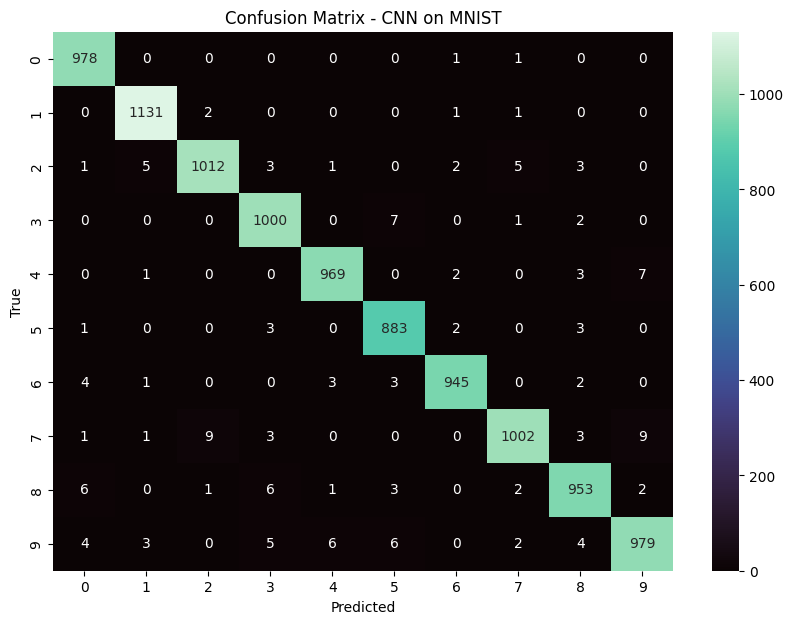

In [77]:
import time

model.eval()
start_time = time.time()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

cnn_infer_time = time.time() - start_time
acc = accuracy_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred, average='weighted')
cnn_params = sum(p.numel() for p in model.parameters()) / 1e6
print(f"\nAccuracy: {acc:.2f}%")
print(f"F1-score: {f1:.4f}")

cm= confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='mako', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - CNN on MNIST')
plt.show()

In [70]:
transform_pretrained= transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

test_data = datasets.MNIST(root='./data/MNIST_transformed', train=False, download=True, transform=transform_pretrained)
test_loader= DataLoader(test_data, batch_size=64, shuffle=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# pre-trained models
import torchvision.models as tv_models

models_dict = {
    "MobileNetV2": tv_models.mobilenet_v2(weights=tv_models.MobileNet_V2_Weights.DEFAULT),
    "EfficientNetB0": tv_models.efficientnet_b0(weights=tv_models.EfficientNet_B0_Weights.DEFAULT)
}


# modifying final layers to output 10 MNIST classes
for name, model in models_dict.items():
    model.classifier[-1]= nn.Linear(model.classifier[-1].in_features, 10)
    model.to(device)
    model.eval() 



Evaluating MobileNetV2


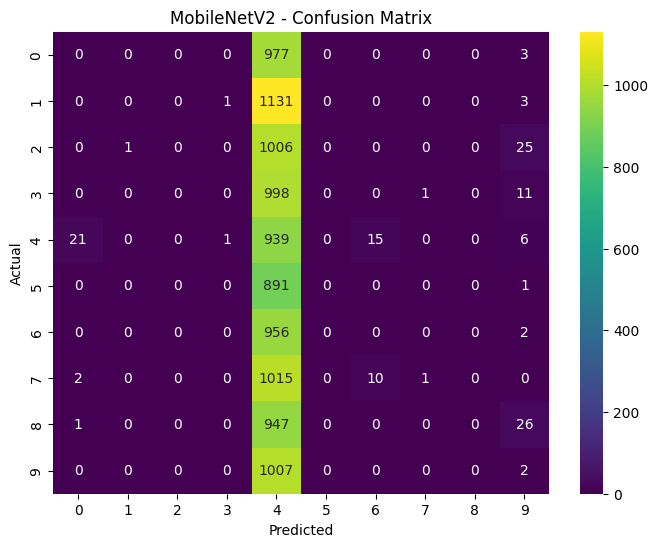


Evaluating EfficientNetB0


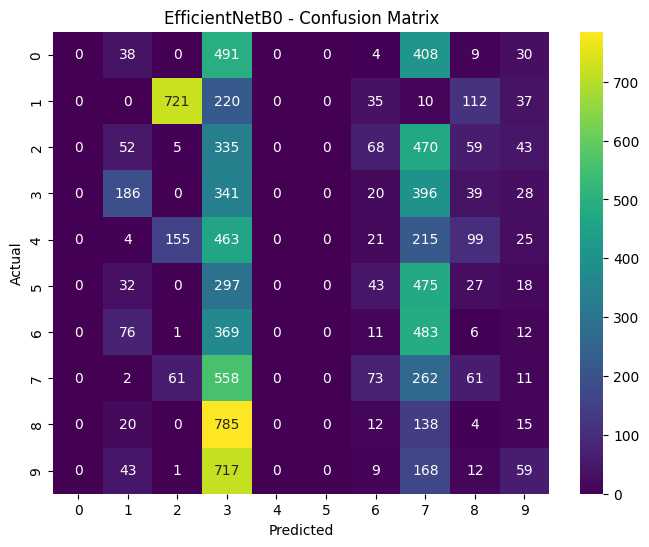

In [71]:
import time
for name, model in models_dict.items():
    print(f"\nEvaluating {name}")
    start_time= time.time()
    results={}
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels= images.to(device), labels.to(device)
            outputs= model(images)
            preds= outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc= accuracy_score(all_labels, all_preds)
    f1= f1_score(all_labels, all_preds, average='macro')
    conf= confusion_matrix(all_labels, all_preds)
    params= sum(p.numel() for p in model.parameters()) / 1e6 
    infer_time= time.time() - start_time

    results[name] = {
        "Accuracy": acc,
        "F1 Score": f1,
        "Parameters (M)": params,
        "Inference Time (s)": infer_time,
        "Confusion Matrix": conf
    }

    plt.figure(figsize=(8,6))
    sns.heatmap(conf, annot=True, fmt='d', cmap='viridis')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [79]:

results["CNN"] = {
    "Accuracy": acc/100,
    "F1 Score": f1,
    "Parameters (M)": cnn_params,
    "Inference Time (s)": cnn_infer_time,
    "Confusion Matrix": cm
}

print("\nModel Comparison:")
for name, stats in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {stats['Accuracy']*100:.2f}%")
    print(f"F1 Score: {stats['F1 Score']:.4f}")
    print(f"Model Size: {stats['Parameters (M)']:.2f}M parameters")
    print(f"Inference Time: {stats['Inference Time (s)']:.2f} seconds")


Model Comparison:

MobileNetV2:
Accuracy: 9.42%
F1 Score: 0.0179
Model Size: 2.24M parameters
Inference Time: 405.83 seconds

EfficientNetB0:
Accuracy: 6.82%
F1 Score: 0.0371
Model Size: 4.02M parameters
Inference Time: 1302.33 seconds

CNN:
Accuracy: 98.52%
F1 Score: 0.9852
Model Size: 0.69M parameters
Inference Time: 1.31 seconds


Comaprison:-

1) Accuracy & F1-Score- CNN achieved the highest performance with 98.52% Accuracy and a 0.9852 F1-Score. MobileNetV2 performed poorly with 9.42% Accuracy and a 0.0179 F1-Score and EfficientNetB0 scored the lowest with 6.82% Accuracy and a 0.0371 F1-Score.

2) Model Size (Number of Parameters):- CNN was the smallest model with 0.69M parameters. MobileNetV2 was a mid-sized model with 2.24M parameters EfficientNetB0 was the largest model at 4.02M parameters.

3) Inference Time on Test Set:- CNN was the fastest, finishing in 1.31 seconds. MobileNetV2 was significantly slower and took 405.83 seconds. EfficientNetB0 was the slowest by far, requiring 1302.33 seconds.

4) Confusion Matrix Analysis:-
CNN (on MNIST):- This matrix shows a very accurate model. The bright diagonal line indicates most predictions were correct. Off-diagonal cells are dark (low numbers), which show few misclassifications. For example, the model occasionally mistook a 9 for a 4 (4 times) or a 4 for a 9 (3 times).

MobileNetV2:- This matrix shows a poor model. The single, bright vertical column at Predicted = 4 signifies that the model learned to output only 4 for nearly every input. For example, it saw 1,131 images of 1 and predicted 4 for all of them. The diagonal is almost entirely 0, meaning it rarely classified correctly.

EfficientNetB0:- This matrix also shows poor model, but with a different error pattern. There are multiple bright vertical columns, specifically at Predicted = 3 and Predicted = 7. This shows the model is heavily biased and outputs only a few classes. For example, it incorrectly predicted 3 for 785 images of 8 and 7 for 470 images of 2. Like MobileNetV2, this model failed to learn the actual patterns in the data.